In [191]:
import numpy as np # linear algebra
import pandas as pd # data processing
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

from scipy import stats
from scipy.stats import norm, skew # statistics

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ventes-fonciers-alpes-maritimes-1er-semestre/data-ventes-fonciers.csv


On lit notre fichier csv et on visualise le df

In [192]:
train = pd.read_csv('/kaggle/input/ventes-fonciers-alpes-maritimes-1er-semestre/data-ventes-fonciers.csv', sep=';')
train.head()

,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,...,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain
0,03/01/2020,Vente,61690000.0,8.0,RUE,5600,ROSSINI,6000.0,NICE,6,...,NaN,NaN,NaN,NaN,2,2.0,Appartement,98.0,4.0,NaN
1,10/01/2020,Vente,1500000.0,28.0,AV,2475,FLORES,6000.0,NICE,6,...,NaN,NaN,NaN,NaN,1,4.0,Local industriel. commercial ou assimilÃ©,31.0,0.0,NaN
2,10/01/2020,Vente,1500000.0,28.0,AV,2475,FLORES,6000.0,NICE,6,...,NaN,NaN,NaN,NaN,1,4.0,Local industriel. commercial ou assimilÃ©,90.0,0.0,NaN
3,10/01/2020,Vente,40500000.0,1.0,RUE,6570,VALPERGA,6000.0,NICE,6,...,NaN,NaN,NaN,NaN,1,2.0,Appartement,90.0,4.0,NaN
4,08/01/2020,Vente,10500000.0,2.0,RUE,610,BARLA,6300.0,NICE,6,...,NaN,NaN,NaN,NaN,1,4.0,Local industriel. commercial ou assimilÃ©,58.0,0.0,NaN


# **Data Cleaning**


* On ne va garder seulement les type appart et maison pour cette analyse

In [193]:
indices = train[train['Code type local'] == 4.0].index
print("avant drop ", train.shape)
train.drop(indices, inplace=True)

# on reverifie
print("apres drop ", train.shape)

avant drop  (18831, 31)
apres drop  (18045, 31)


In [194]:
indices = train[train['Code type local'] == 3.0].index
print("avant drop ", train.shape)
train.drop(indices, inplace=True)

# on reverifie
print("apres drop ", train.shape)

avant drop  (18045, 31)
apres drop  (12529, 31)


* nous ne prenons que les ventes dont le nb de lots est 0 ou 1, car le dataset affiche le même prix globale à chaque lot
* on drop les lignes n'ayant pas de ㎡ batie
* on drop les lignes ayant un prix de vente different de zero


In [195]:
# drop lignes, nb lots != 1 or 0
indices = train[train['Nombre de lots'] > 1].index
print("avant drop nb lots", train.shape)
train.drop(indices, inplace=True)

# on reverifie
print("apres drop nb lots", train.shape)



avant drop nb lots (12529, 31)
apres drop nb lots (9267, 31)


In [196]:
# lignes n'ayant pas de m^2 batie
indices = train[train['Surface reelle bati'].isnull()].index
print("avant drop nb lots", train.shape)
train.drop(indices, inplace=True)

# on reverifie
print("apres drop nb lots", train.shape)


avant drop nb lots (9267, 31)
apres drop nb lots (5442, 31)


In [197]:
# prix de vente
indices = train[train['Valeur fonciere'].isnull()].index
print("avant drop nb lots", train.shape)
train.drop(indices, inplace=True)

indices = train[train['Valeur fonciere'] <= 1000].index
train.drop(indices, inplace=True)

# on reverifie
print("apres drop nb lots", train.shape)

avant drop nb lots (5442, 31)
apres drop nb lots (5438, 31)


On va voir tous les colonnes afin de voir s'il y en a qu'on pourra enlever encore

In [198]:
print(len(train.columns))
print(train.columns)


31
Index(['Date mutation', 'Nature mutation', 'Valeur fonciere', 'No voie',
       'Type de voie', 'Code voie', 'Voie', 'Code postal', 'Commune',
       'Code departement', 'Code commune', 'Prefixe de section', 'Section',
       'No plan', 'No Volume', '1er lot', 'Surface Carrez du 1er lot',
       '2eme lot', 'Surface Carrez du 2eme lot', '3eme lot',
       'Surface Carrez du 3eme lot', '4eme lot', 'Surface Carrez du 4eme lot',
       '5eme lot', 'Surface Carrez du 5eme lot', 'Nombre de lots',
       'Code type local', 'Type local', 'Surface reelle bati',
       'Nombre pieces principales', 'Surface terrain'],
      dtype='object')


On remarque que la plupart sont inutiles
on ne va donc garder que : 
* Valeur fonciere
* Voie
* Code postal
* Code type local
* Surface réelle batie
* Nombre pieces
* Surface terrain

In [199]:
# drop colonnes inutiles
train = train[['Valeur fonciere','Voie', 'Code postal', 'Code type local','Surface reelle bati', 'Nombre pieces principales', 'Surface terrain']]
train.head()



,Valeur fonciere,Voie,Code postal,Code type local,Surface reelle bati,Nombre pieces principales,Surface terrain
3,40500000.0,VALPERGA,6000.0,2.0,90.0,4.0,NaN
5,20000000.0,LE NEGRESCO,6000.0,2.0,26.0,1.0,NaN
6,21255000.0,LAMARTINE,6000.0,2.0,95.0,3.0,NaN
8,16000000.0,EMMANUEL PHILIBERT,6300.0,2.0,34.0,3.0,NaN
9,32000000.0,FLORES,6000.0,2.0,31.0,2.0,NaN


**Ameiloration possible**

utiliser le code voie fantoir, ce code pourra remplacer l'adresse. Mais il n'existe pas d'api pour rentrer l'adresse et obtenir le code fantoir donc cela nous rajouterai beaucoup de travail.

In [200]:
train['Valeur fonciere'].mean()

45465477.94685546

On remarque que les prix sont pas exacts. Ceci est dû au fait que le point virgule n'est pas reconnu par pandas donc une valeur fonciere de 100000,00 s'affiche comme 100000000 donc il faudrait diviser toutes les lignes par 100 pour rétablir l'exactitude

In [201]:
def div_ligne(valeur_fonciere):
    return valeur_fonciere/100

train['Valeur fonciere'] = train['Valeur fonciere'].apply(div_ligne)
train.head()

,Valeur fonciere,Voie,Code postal,Code type local,Surface reelle bati,Nombre pieces principales,Surface terrain
3,405000.0,VALPERGA,6000.0,2.0,90.0,4.0,NaN
5,200000.0,LE NEGRESCO,6000.0,2.0,26.0,1.0,NaN
6,212550.0,LAMARTINE,6000.0,2.0,95.0,3.0,NaN
8,160000.0,EMMANUEL PHILIBERT,6300.0,2.0,34.0,3.0,NaN
9,320000.0,FLORES,6000.0,2.0,31.0,2.0,NaN


In [202]:
train['Valeur fonciere'].mean()

454654.7794685546

Verifions le nb de NaN

In [203]:
train.isnull().sum().sum()

3872

Il y a encore beaucoup de données manquantes. Verifions dans quelles colonnes se situent les NaN

In [204]:
nan_valeurs = train.isna()
nan_col = nan_valeurs.any()

col_nan = train.columns[nan_col].tolist()
print(col_nan)

['Surface terrain']


Pas surprenant car les appartements n'ont pas de terrain.
La chose logique sera de remplacer les NaN par 0.

In [205]:
train['Surface terrain'] = train['Surface terrain'].fillna(0)
train.tail()

,Valeur fonciere,Voie,Code postal,Code type local,Surface reelle bati,Nombre pieces principales,Surface terrain
18824,735000.0,FONTAINE DE LA SOURCE,6570.0,1.0,115.0,5.0,852.0
18825,735000.0,FONTAINE DE LA SOURCE,6570.0,1.0,45.0,2.0,500.0
18826,735000.0,FONTAINE DE LA SOURCE,6570.0,1.0,45.0,2.0,852.0
18827,735000.0,FONTAINE DE LA SOURCE,6570.0,1.0,115.0,5.0,500.0
18830,130000.0,ANATOLE FRANCE,6800.0,2.0,45.0,1.0,0.0


reverifions le nb de NaN

In [206]:
train.isnull().sum().sum()

0

In [207]:
train.shape

(5438, 7)

on enleve les données dupliqué

In [208]:
train.duplicated().sum()

110

In [209]:
# lignes dupliqué
indices = train[train.duplicated()].index
print("avant drop dupliqué", train.shape)
train.drop(indices, inplace=True)

# on reverifie
print("apres drop dupliqué", train.shape)

avant drop dupliqué (5438, 7)
apres drop dupliqué (5328, 7)


# Feature Engineering

Regardons la correlation entres les variables

<AxesSubplot:>

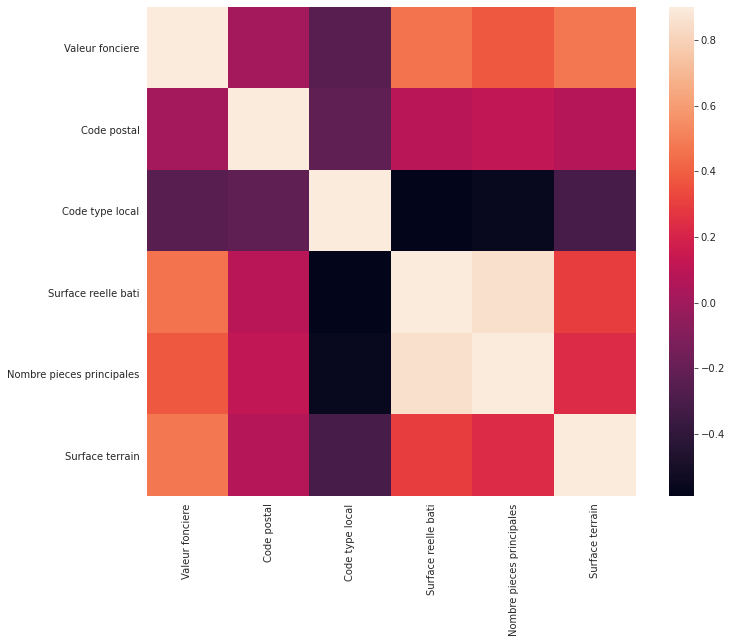

In [210]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

On donnes des labels numerique aux voies pour faciliter la tache du modele.

In [211]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train.Voie= le.fit_transform(train.Voie.values)

Etonnament la surface a une plus grande importance que la ville

In [212]:
train.head()

,Valeur fonciere,Voie,Code postal,Code type local,Surface reelle bati,Nombre pieces principales,Surface terrain
3,405000.0,1694,6000.0,2.0,90.0,4.0,0.0
5,200000.0,1342,6000.0,2.0,26.0,1.0,0.0
6,212550.0,1325,6000.0,2.0,95.0,3.0,0.0
8,160000.0,1081,6300.0,2.0,34.0,3.0,0.0
9,320000.0,1100,6000.0,2.0,31.0,2.0,0.0


<AxesSubplot:>

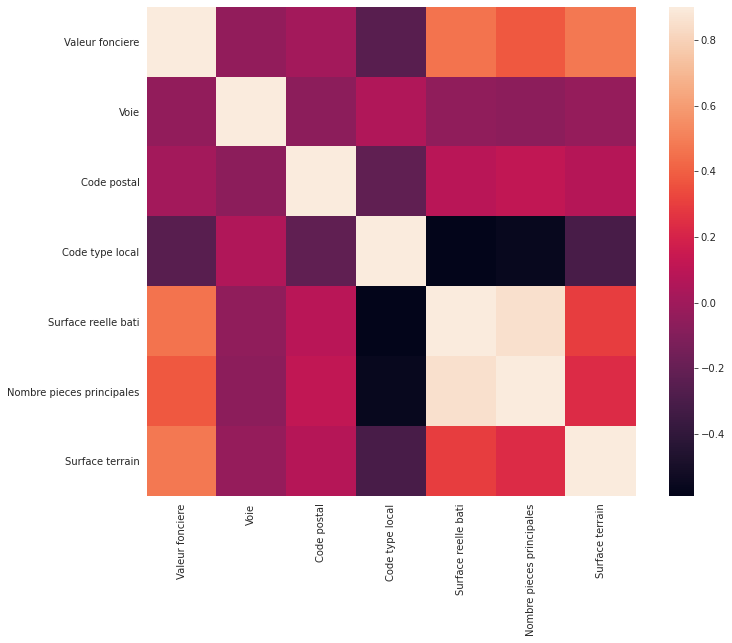

In [213]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

Regardons maintenant le taux de bias dans les variables

In [214]:
donnee_num = train.dtypes[train.dtypes != "object"].index


var_biasee = train[donnee_num].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nBias dans les données: \n")
bias = pd.DataFrame({'Bias' :var_biasee})
bias.head(10)


Bias dans les données: 



,Bias
Surface terrain,26.864792
Valeur fonciere,11.650087
Surface reelle bati,2.286978
Nombre pieces principales,1.194268
Code postal,0.502659
Voie,0.096908
Code type local,-1.062686


Appliquons la transformation [box cox](http://onlinestatbook.com/2/transformations/box-cox.html) de 1+x

In [215]:
#bias = bias[abs(bias) > 0.75]
#print("Il y a {} vars à transformer".format(skewness.shape[0]))

#from scipy.special import boxcox1p
#var_biasee = bias.index
#lam = 0.15
#for var in var_biasee:
#    train[var] = boxcox1p(train[var], lam)

# Modelling

separons données d'entrainement et les données que nous allons utiliser pour tester

In [216]:
Y = train['Valeur fonciere']
X = train[['Voie', 'Code postal', 'Code type local',
       'Surface reelle bati', 'Nombre pieces principales', 'Surface terrain']]

In [248]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15)

In [249]:
y_test.shape

(800,)

Créeons la fonction pour tester nos modèles

In [218]:
from sklearn.metrics import mean_absolute_error

def score_model(model):
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    return mean_absolute_error(y_test, predictions)

## Testons quelques modèles

**Random Forest**

In [243]:
from sklearn.ensemble import RandomForestRegressor
RFR_model = RandomForestRegressor(n_estimators=100, random_state=0)
print(score_model(RFR_model))

47029.29999999999


**Boosting de gradient**

In [242]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
print(score_model(xgb_model))

26475.09375


In [244]:
from lightgbm import LGBMRegressor
lgbm_model = LGBMRegressor(objective='regression', num_leaves=5,learning_rate=0.007, n_estimators=3500,max_bin=163,
                       bagging_fraction=0.35711,bagging_freq=4, bagging_seed=8,feature_fraction=0.1294, feature_fraction_seed=8,
                       min_data_in_leaf = 8,  verbose=-1, random_state=42,n_jobs=-1)
print(score_model(lgbm_model))

[LightGBM] [Warning] bagging_fraction is set=0.35711, subsample=1.0 will be ignored. Current value: bagging_fraction=0.35711
[LightGBM] [Warning] feature_fraction is set=0.1294, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1294
[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
28586.916561840742


In [245]:
xgb_model2 = XGBRegressor(
    learning_rate=0.0139,
    n_estimators=4500,
    max_depth=4,
    min_child_weight=0,
    subsample=0.7968,
    colsample_bytree=0.4064,
    nthread=-1,
    scale_pos_weight=2,
    seed=42,
)
print(score_model(xgb_model2))

67706.96875


In [223]:
y_train.mean()

429390.715055266

# Conclusion

Notre meilleur modèle est donc xgbRegressor mais avec un mae assez élevé de **26475**. 
Etant donnée que le modèle LGBMRegressor était assez proche du xgb on aurait pu regrouper les modeles et faire des prediction en donnant plus de poids à l'XGBRegressor.
Dans l'ensemble le processus de data cleaning est à ameilorer.